In [17]:
#Importing the dependecies 
#!conda install --yes basemap 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from citipy import citipy


In [10]:
# Loading the file
file = "meteorite-landings.csv"

# Reading the meteor csv data file 
meteor = pd.read_csv(file)


# Displaying the data table for preview
meteor.head(5)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [11]:
meteor = meteor.rename(columns ={"recclass": "type", "fall": "discovery", "nametype": "appearance", "reclat": "lat", "reclong": "long", "GeoLocation": "coordinates"})

meteor.head()


,name,id,appearance,type,mass,discovery,year,lat,long,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [12]:
#Dropping some unecessary columns 
meteor = meteor.drop(columns = ["id", "coordinates"])
meteor.head()

,name,appearance,type,mass,discovery,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


/Users/physics/anaconda/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/physics/anaconda/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0.5,1,'Full Disk Orthographic Projection')

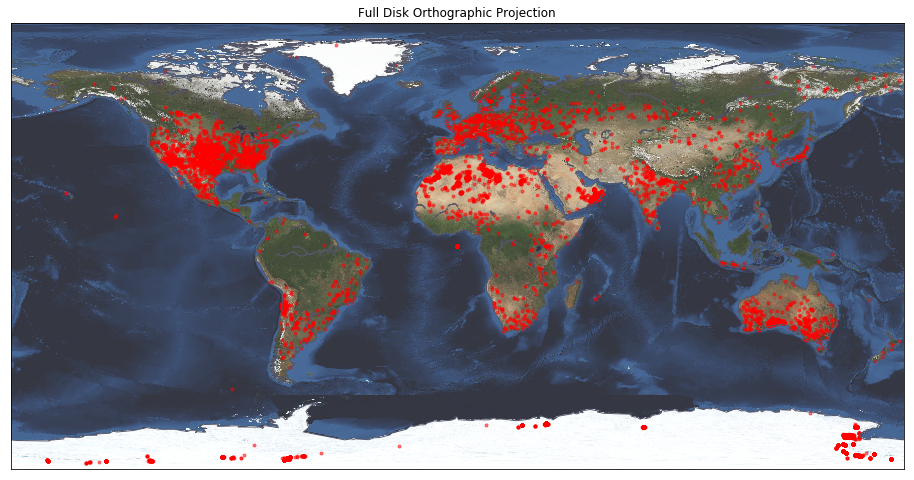

In [37]:
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(16,11))
# m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
m = Basemap()
m.bluemarble(alpha=0.8)
m.drawcoastlines(color="#555566", linewidth=1)
plt.scatter(meteor['long'], meteor['lat'], c='red', marker='.', alpha=0.5)
# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# #draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Orthographic Projection")

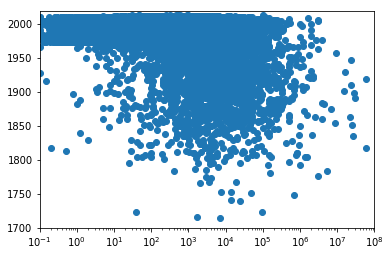

In [43]:
plt.scatter(meteor["mass"], meteor["year"])
plt.xlim([0.1,1e8])
plt.ylim([1700,2020])
plt.xscale('log')
plt.show()

In [46]:
n_types = meteor['type'].unique().size
print(f'There are {n_types} unique meteor types.')

There are 466 unique meteor types.


/Users/physics/anaconda/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/physics/anaconda/envs/PythonData/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0.5,1,'Meteor Type Martian (nakhlite)')

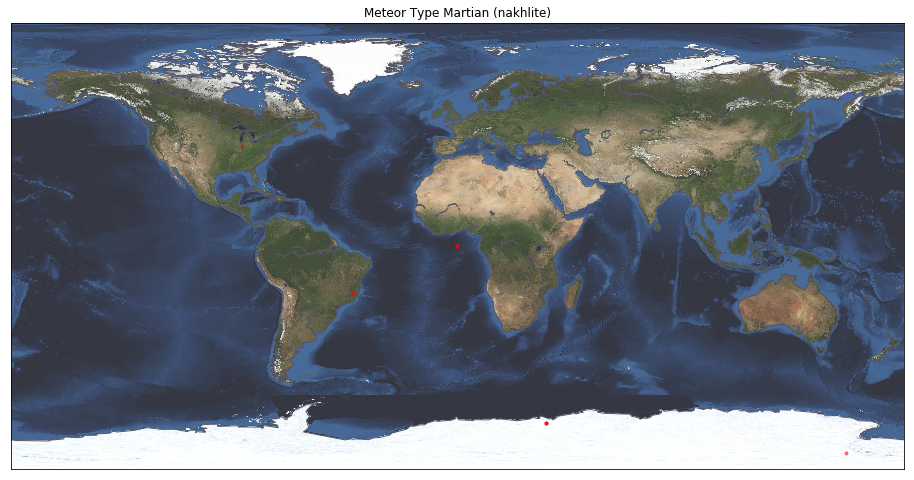

In [61]:
# Look at one specific type
meteor_type = "Martian (nakhlite)"
L5 = meteor.loc[meteor['type'] == meteor_type]
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(16,11))
# m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
m = Basemap()
m.bluemarble(alpha=0.8)
m.drawcoastlines(color="#555566", linewidth=1)
plt.scatter(L5['long'], L5['lat'], c='red', marker='.', alpha=0.5)
# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# #draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title(f"Meteor Type {meteor_type}")

In [53]:
meteor['type'].unique()

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an', 'LL5',
       'CI1', 'L/LL4', 'Eucrite-mmict', 'CV3', 'Ureilite-an',
       'Stone-uncl', 'L3', 'Angrite', 'LL6', 'L4', 'Aubrite',
       'Iron, IIAB', 'Iron, IAB-sLL', 'Iron, ungrouped', 'CM2', 'OC',
       'Mesosiderite-A1', 'LL4', 'C2-ung', 'LL3.8', 'Howardite',
       'Eucrite-pmict', 'Diogenite', 'LL3.15', 'LL3.9', 'Iron, IAB-MG',
       'H/L3.9', 'Iron?', 'Eucrite', 'H4-an', 'L/LL6', 'Iron, IIIAB',
       'H/L4', 'H4-5', 'L3.7', 'LL3.4', 'Martian (chassignite)', 'EL6',
       'H3.8', 'H3-5', 'H5-6', 'Mesosiderite', 'H5-7', 'L3-6', 'H4-6',
       'Ureilite', 'Iron, IID', 'Mesosiderite-A3/4', 'CO3.3', 'H3',
       'EH3/4-an', 'Iron, IIE', 'L/LL5', 'H3.7', 'CBa', 'H4/5', 'H3/4',
       'H?', 'H3-6', 'L3.4', 'Iron, IAB-sHL', 'L3.7-6', 'EH7-an', 'Iron',
       'CR2', 'CO3.2', 'K3', 'L5/6', 'CK4', 'Iron, IIE-an', 'L3.6',
       'LL3.2', 'CO3.5', 'Lodran